## Pastabos Rimui dėl turinio
* Savo darbe aš apibrėžiau, kad bet kuris narys $(x,y)\in X$, čia $X$ - sąryšis, tenkina tam tikras savybes. Tolimesnėje darbo dalyje priklausomai nuo konteksto, bus įvardyta, kokioms aibėms priklauso dvejetų, priklausančių $X$, nariai - ar teigiamų realiųjų skaičių, ar visų realiųjų, ar dydžiai su tam tikromis skaitinėmis dalimis. Ar man tikrai būtina dabar apibrėžinėti aibes? Nežinau, kaip tai ,,švariai" padaryti. Nario $(x,y)\in X$ pavyzdys: (4 pieštukai, 6 pieštukai).
* Darbo citata: **Kitais [ne fizikinių dydžių] atvejais dydis dažnai buna susijes su objektu: picų, obuolių, žmonių, geometrinių figurų ir pan. skaičiavimu, todel matavimo vienetais laikomi tam tikri objektai.** Čia aš įvedu savo deklaraciją, dėl kurios visuotinio priimtinumo abejoju. 4 pieštukai man - dydis, turintis skaitinę reikšmę 4 ir matavimo vienetą - pieštuką. Bet kurio ETU veiksmo kategorizavime $(a*b=c)$ siekiu paaiškinti, kokius dydžius ženklina kintamieji. Jei $a$ = 4 pieštukai ne dydis, tai nėra kaip toliau kalbėti apie realaus pasaulio konteksto uždavinius.
* Du dydžiai nėra dauginami ar dalijami. Apibrėžtas tik jų santykis (ir sandauga)? O gal santykis - taip pat ne dydis, o tik palyginimas arba skaičius? Minties dėl dalijimu, dauginimo taip ir nesupratau. Kontrargumentai:

  * Paskaičiau ***Ratios, proportions, and angles skyrelį*** ir jis tik patvirtino bedimensio dydžio supratimą: jie dažnai išreiškiami santykiais dviejų dydžių, kurie nėra bedimensiai, bet išsiprastina, pvz. funkcijos krypties koeficientas, deformacija, alkoholio stiprumas procentais. 
  * International dictionary of metrology viskas labai aišku.
  * Mano darbe vartojama sąvoka, kad, jei visiems $(x,y)\in X$ reiškinio reikšmė $x:y$ vienoda, tai $x$ ir $y$ yra susieti santykiu. ETU kontekste $x$ ir $y$ dydžiai. Tuo tarpu esant vienodai $x\times y$ reikšmei prireikia vieną kintamąjį laikyti bedimensiu dydžiu. Kodėl $x:y$ negalima laikyti dalijimu, o $x\times y$ - dauginimu, nesuprantu.
  
* Mišriojo dydžio sąvoką pirmą kartą girdžiu ir nežinau, kur rasti. Bandžiau dar įvesti ***mixed quantity*** - nepavyko. Rodo ***mixed number***, kas yra visai kita sąvoka.
* Dėl kategorijų vs subkonstruktų nieko negaliu padaryti - tiesiog poskyrius pervadinau visus vienodai.

In [56]:
import pandas as pd
df = pd.read_excel('test.xlsx', index_col=[0,1]).reset_index()
df.fillna(-1, inplace=True)
df.set_index(['Operacija', 'Kategorija', 'Subkategorija'])
print(df.to_latex())

\begin{tabular}{llllll}
\toprule
{} &      Tekstas & Veiksmas & Operacija & Kategorija & Subkategorija \\
\midrule
0 &  Uždavinys 1 &      aAb &         A &         A1 &          A1a2 \\
1 &  Uždavinys 1 &      aBb &         B &         B3 &            -1 \\
2 &  Uždavinys 2 &      aCb &         C &         C2 &          C2c3 \\
3 &  Uždavinys 2 &      aCb &         C &         C1 &          C1c1 \\
4 &  Uždavinys 2 &      aAb &         A &         A1 &          A1a3 \\
5 &  Uždavinys 3 &      aCb &         C &         C1 &          C1c2 \\
6 &  Uždavinys 3 &      aCb &         C &         C2 &          C2c3 \\
7 &  Uždavinys 3 &      aDb &         D &         D4 &          D4d2 \\
\bottomrule
\end{tabular}



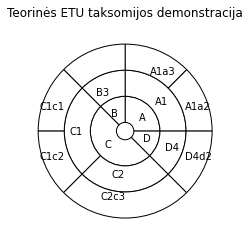

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
level1_names = ['A', 'B', 'C', 'D']
level2_names = ['A1', 'B3', 'C1', 'C2', 'D4']
level3_names = ['A1a2', 'A1a3', '', 'C1c1', 'C1c2', 'C2c3', 'D4d2']
ax.pie(df.groupby('Operacija').size(), radius=0.4, 
       labels=level1_names, labeldistance=0.55,
       wedgeprops=dict(width=0.3, edgecolor='k', fc='w'))
ax.pie(df.groupby(['Operacija', 'Kategorija']).size(), radius=0.7, 
       labels=level2_names, labeldistance=0.7,
       wedgeprops=dict(width=0.3, edgecolor='k', fc='w'))
ax.pie(df.groupby(['Operacija', 'Kategorija', 'Subkategorija']).size(), radius=1, 
       labels=level3_names, labeldistance=0.75,
       wedgeprops=dict(width=0.3, edgecolor='k', fc='w'))
ax.set(aspect="equal", title='Teorinės ETU taksomijos demonstracija')
plt.savefig('yra.png')
plt.show()

<Figure size 432x288 with 0 Axes>

In [41]:
df.fillna(-1, inplace=True).groupby(['Operacija', 'Kategorija', 'Subkategorija']).size()

AttributeError: 'NoneType' object has no attribute 'groupby'

In [18]:
df.fillna(-1, inplace=True)
df['Veiksmas']

Operacija  Kategorija  Subkategorija
atimtis    a           NaN              1-0
sudėtis    b           bah              1+1
daugyba    c           bac              1*1
           d           NaN              1*0
sudėtis    c           bac              1+1
Name: Veiksmas, dtype: object

In [73]:
df.groupby(['Operacija', 'Kategorija', 'Subkategorija']).size()

Operacija  Kategorija  Subkategorija
daugyba    c           bac              1
sudėtis    b           bah              1
           c           bac              1
dtype: int64